In [1]:
import numpy as np, pandas as pd

# RMSSE calculation
def rmsse(train, test, forecast):
    forecast_mse = np.mean((test - forecast) ** 2, axis=0)
    train_mse = np.mean((np.diff(np.trim_zeros(train)) ** 2))
    return np.sqrt(forecast_mse / train_mse)

# Location 1 - Savanna Preserve
data_src = '../1 - Savanna Preserve/' # location od case study files for evaluation
forecast = pd.read_csv('1_ifs_eval.csv')
train = pd.read_csv(data_src + '1_y_train.csv',index_col=0)
test = pd.read_csv(data_src + '1_y_test.csv',index_col=0)
# rmsse (last 31 days as train for scaling)
temp_rmsse = rmsse(train.values[-31*24:,2], test.values[:,2], forecast.values[:,1])
hum_rmsse = rmsse(train.values[-31*24:,3], test.values[:,3], forecast.values[:,2])
# overall rmsse
savanna_rmsse = (temp_rmsse + hum_rmsse) / 2

# Location 2 - Clean Urban Air



In [2]:
test.head()

,location_id,date,temperature_2m,relative_humidity_2m
0,1,2024-09-24 00:00:00+00:00,15.547000,70.0
1,1,2024-09-24 01:00:00+00:00,15.047000,69.0
2,1,2024-09-24 02:00:00+00:00,14.646999,68.0
3,1,2024-09-24 03:00:00+00:00,14.447000,70.0
4,1,2024-09-24 04:00:00+00:00,14.497000,75.0


In [3]:
forecast.head()

,time,temperature_2m,relative_humidity_2m
0,2024-09-24T00:00,17.4,58
1,2024-09-24T01:00,16.8,62
2,2024-09-24T02:00,16.2,66
3,2024-09-24T03:00,16.3,68
4,2024-09-24T04:00,17.5,64


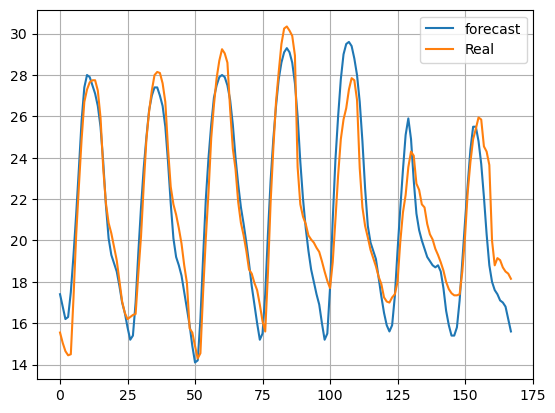

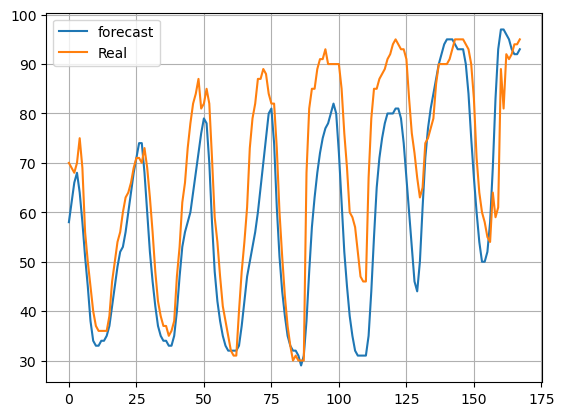

In [4]:
import matplotlib.pyplot as plt

plt.plot(forecast['temperature_2m'], label="forecast")
plt.plot(test['temperature_2m'], label="Real")
plt.legend()
plt.grid()
plt.show()



plt.plot(forecast['relative_humidity_2m'], label="forecast")
plt.plot(test['relative_humidity_2m'],  label="Real")
plt.legend()
plt.grid()
plt.show()

In [33]:
data_src = '../2 - Clean Urban Air/' # location od case study files for evaluation
forecast_hum = pd.read_csv('2_ifs_eval.csv') # humidity forecast (ECMWF IFS model)
forecast_aqi = pd.read_csv('2_cams_eval.csv') # humidity forecast (ECMWF IFS model)
train = pd.read_csv(data_src + '2_y_train.csv',index_col=0)
test = pd.read_csv(data_src + '2_y_test.csv',index_col=0)
# rmsse (last 31 days as train for scaling)
hum_rmsse = rmsse(train.values[-31*24:,2], test.values[:,2], forecast_hum.values[:,1])
aqi_rmsse = rmsse(train.values[-31*24:,3], test.values[:,3], forecast_aqi.values[:,1])
# overall rmsse
urban_rmsse = (hum_rmsse + aqi_rmsse) / 2



In [34]:
test.head()

,location_id,date,relative_humidity_2m,us_aqi
0,2,2024-09-24 00:00:00+00:00,95.0,110.604164
1,2,2024-09-24 01:00:00+00:00,96.0,111.010410
2,2,2024-09-24 02:00:00+00:00,94.0,111.395820
3,2,2024-09-24 03:00:00+00:00,91.0,111.864580
4,2,2024-09-24 04:00:00+00:00,85.0,112.479164


In [35]:
forecast_hum.head()

,time,relative_humidity_2m
0,2024-09-24T00:00,92
1,2024-09-24T01:00,95
2,2024-09-24T02:00,97
3,2024-09-24T03:00,94
4,2024-09-24T04:00,84


In [36]:
forecast_aqi.head()

,time,us_aqi
0,2024-09-24T00:00,111
1,2024-09-24T01:00,111
2,2024-09-24T02:00,111
3,2024-09-24T03:00,112
4,2024-09-24T04:00,112


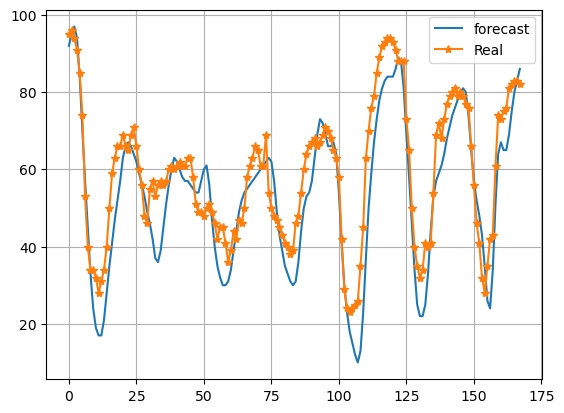

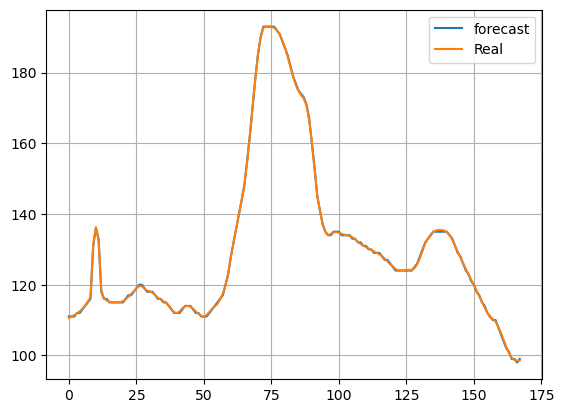

In [37]:
import matplotlib.pyplot as plt

plt.plot(forecast_hum['relative_humidity_2m'], label="forecast")
plt.plot(test['relative_humidity_2m'], marker="*", label="Real")
plt.legend()
plt.grid()
plt.show()



plt.plot(forecast_aqi['us_aqi'], label="forecast")
plt.plot(test['us_aqi'], label="Real")
plt.legend()
plt.grid()

plt.show()

In [38]:
# Location 3 - Resilient Fields
data_src = '../3 - Resilient Fields/' # location od case study files for evaluation
forecast = pd.read_csv('3_ifs_eval.csv')
train = pd.read_csv(data_src + '3_y_train.csv',index_col=0)
test = pd.read_csv(data_src + '3_y_test.csv',index_col=0)
# rmsse (last 31 days as train for scaling)
prec_rmsse = rmsse(train.values[-31*24:,2], test.values[:,2], forecast.values[:,1])
irr_rmsse = rmsse(train.values[-31*24:,3], test.values[:,3], forecast.values[:,2])
# overall rmsse


In [39]:
test.head()

,location_id,date,precipitation,global_tilted_irradiance
0,3,2024-09-24 00:00:00+00:00,0.0,0.0
1,3,2024-09-24 01:00:00+00:00,0.0,0.0
2,3,2024-09-24 02:00:00+00:00,0.0,0.0
3,3,2024-09-24 03:00:00+00:00,0.0,0.0
4,3,2024-09-24 04:00:00+00:00,0.0,0.0


In [40]:
forecast.head()

,time,precipitation,global_tilted_irradiance
0,2024-09-24T00:00,0.0,0.0
1,2024-09-24T01:00,0.0,0.0
2,2024-09-24T02:00,0.0,0.0
3,2024-09-24T03:00,0.0,0.0
4,2024-09-24T04:00,0.0,0.0


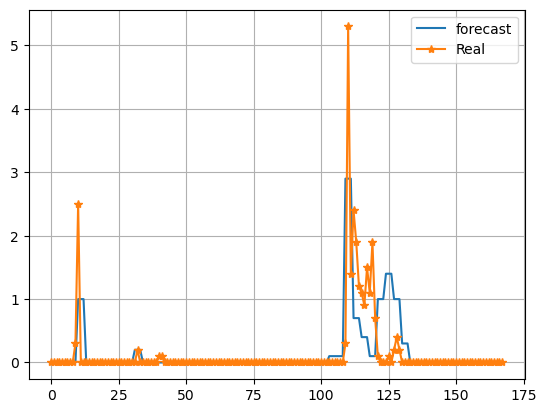

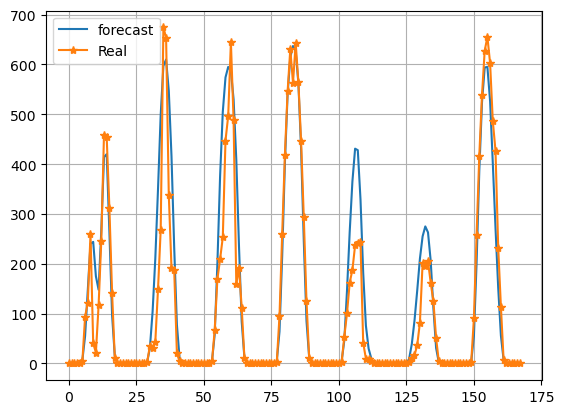

In [41]:
import matplotlib.pyplot as plt

plt.plot(forecast['precipitation'], label="forecast")
plt.plot(test['precipitation'], marker="*", label="Real")
plt.legend()
plt.grid()
plt.show()



plt.plot(forecast['global_tilted_irradiance'], label="forecast")
plt.plot(test['global_tilted_irradiance'],marker="*",  label="Real")
plt.legend()
plt.grid()
plt.show()

In [42]:
res_fields_rmsse = (temp_rmsse + hum_rmsse) / 2

# print results
print('RMSSE')
print(f"1 - Savanna Preserve: {savanna_rmsse:.3f}")
print(f"2 - Clean Urban Air: {urban_rmsse:.3f}")
print(f"3 - Resilient Fields: {res_fields_rmsse:.3f}")
print(f"Overall: {(savanna_rmsse+urban_rmsse+res_fields_rmsse)/3:.3f}")

RMSSE
1 - Savanna Preserve: 1.636
2 - Clean Urban Air: 0.793
3 - Resilient Fields: 1.292
Overall: 1.240
